<a href="https://colab.research.google.com/github/Himangi-77/excelR-assignments/blob/main/ASSIGNMENT16_ANN_FORESTFIRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [35]:
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('/content/forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [18]:
le = LabelEncoder()
data.month=le.fit_transform(data['month'])
data.day=le.fit_transform(data['day'])
data.size_category=le.fit_transform(data['size_category'])

In [22]:
pd.set_option('display.max_columns',None)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [26]:
data.shape

(517, 31)

In [25]:
seed = 7
np.random.seed(seed)
x=data.drop(['size_category'],axis=1)
y=data.size_category

In [28]:
model = Sequential()
model.add(Dense(12,input_dim=30,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
history=model.fit(x,y,epochs=150,validation_split=0.33,batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 10ms/step - loss: 0.6943 - accuracy: 0.6821 - val_loss: 0.7223 - val_accuracy: 0.6316
Epoch 2/150
35/35 [==============================] - 0s 5ms/step - loss: 0.6196 - accuracy: 0.7399 - val_loss: 0.7592 - val_accuracy: 0.6199
Epoch 3/150
35/35 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.7543 - val_loss: 0.7894 - val_accuracy: 0.6725
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7514 - val_loss: 0.7646 - val_accuracy: 0.6784
Epoch 5/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5785 - accuracy: 0.7601 - val_loss: 0.7224 - val_accuracy: 0.6784
Epoch 6/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5653 - accuracy: 0.7572 - val_loss: 0.7398 - val_accuracy: 0.6784
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7572 - val_loss: 0.7646 - val_accuracy: 0.6784
Epoch 8/150


In [33]:
scores=model.evaluate(x,y)
print('%s, %.2f%%' % (model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9826
accuracy, 98.26%


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

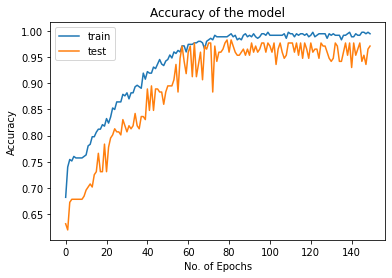

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

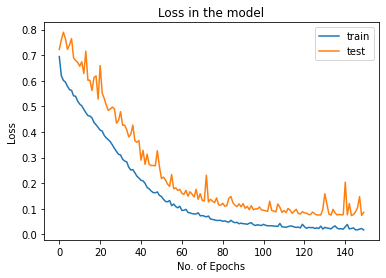

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss in the model')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [51]:
y_pred=np.round(model.predict(x))

17/17 [==============================] - 0s 2ms/step


In [61]:
df=pd.DataFrame(columns={'Actual','Predicted'})
df['Actual']=y
df['Predicted']=y_pred

In [62]:
df

,Actual,Predicted
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
512,0,1.0
513,0,0.0
514,0,0.0
515,1,1.0
